# Data Pre-Processing: assignment #4 - How to preprocess numerical and categorical variables together?

#### Assignement Guide

In [1]:
#Assignement Guide
import Utilities as Util

#file_Description_name = "AssigmentGuide.txt"
#Util.read_txt(file_Description_name)

#### Dataset description

In [2]:
#Dataset description

#file_Description_name = "Dataset/DatasetDescription.txt"
#Util.read_txt(file_Description_name)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import PowerTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

import pickle
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read Dataset
Dataset = pd.read_csv('Dataset/healthcare-dataset-stroke-data.csv')
Dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#remove id colummns from dataset
Dataset=Dataset.drop(["id"], axis = 1)

In [6]:
#Verify duplicates
Dataset = Dataset.drop_duplicates()

In [7]:
#Count Nan values
Dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
Dataset.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
Dataset['hypertension'] = Dataset['hypertension'].astype('object')
Dataset['heart_disease'] = Dataset['heart_disease'].astype('object')
Dataset['age'] = Dataset['age'].astype('int')
Dataset['stroke'] = Dataset['stroke'].astype('object')

### Data Analisis

In [10]:
#Dataset description
Dataset.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.215264,106.147677,28.893237
std,22.633866,45.283560,7.854067
min,0.000000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [11]:
#mode 
aa = Dataset[Dataset['stroke']>0]
aa.mode()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,78.0,0,0,Yes,Private,Urban,101.45,27.3,never smoked,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.4,NaN,NaN


Based on BMI : body mass index


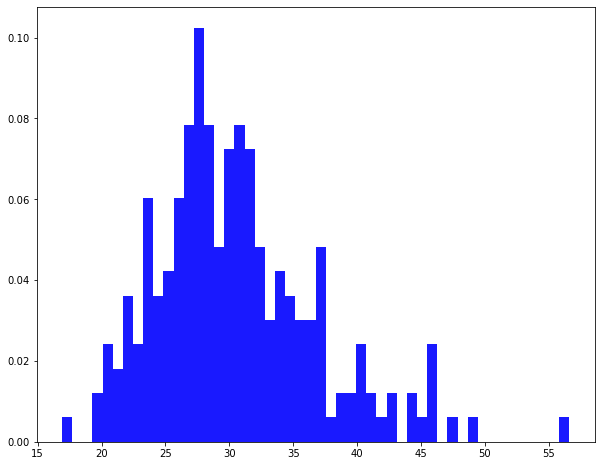

In [12]:
# Plotting the histogram.
print('Based on BMI : body mass index')

plt.figure(figsize=(10,8))
Dataset_test = Dataset[Dataset['stroke']>0]
plt.hist(Dataset_test['bmi'], bins=50, density=True, alpha=0.9, color='b')
  
plt.show()

This normal distribution is used to show whether a patient is likely to get stroke based on **BMI : body mass index** input parameters .

In base of : avg_glucose_level


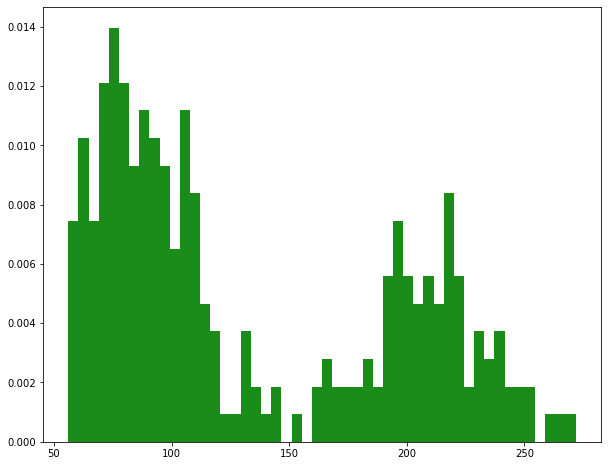

In [13]:
# Plotting the histogram.
print('In base of : avg_glucose_level')

plt.figure(figsize=(10,8))
Dataset_test = Dataset[Dataset['stroke']>0]
plt.hist(Dataset_test['avg_glucose_level'], bins=50, density=True, alpha=0.9, color='g')
  
plt.show()

This normal distribution is used to show whether a patient is likely to get stroke based on **avg_glucose_level** input parameters .

In base of : age past info  


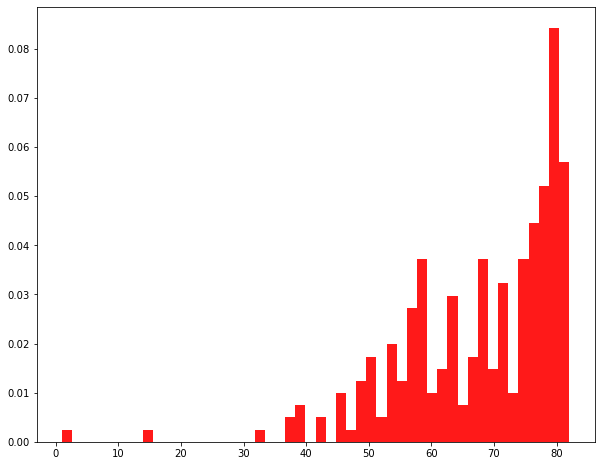

In [14]:
# Plotting the histogram.
print('In base of : age past info  ')

plt.figure(figsize=(10,8))
Dataset_test = Dataset[Dataset['stroke']>0]
plt.hist(Dataset_test['age'], bins=50, density=True, alpha=0.9, color='r')
  
plt.show()

This normal distribution is used to show whether a patient is likely to get stroke based on **age** input parameters .

array([<AxesSubplot:ylabel='stroke'>], dtype=object)

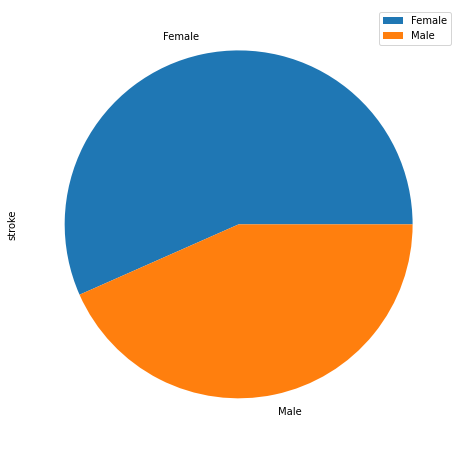

In [15]:
Dataset[['gender','stroke']].groupby('gender').sum().plot.pie(subplots=True,figsize=(10, 8))

In [16]:
train, test = train_test_split(Dataset, shuffle=True, test_size=0.2, random_state=50)
test.to_csv('Dataset/test.csv', header=True, index=False, sep=',')

<AxesSubplot:>

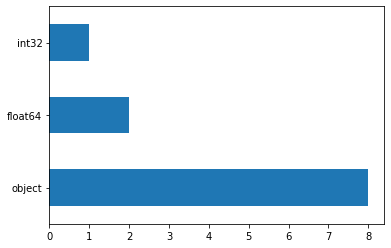

In [17]:
train.dtypes.value_counts().plot.barh()

In [18]:
train.shape , test.shape

((4088, 11), (1022, 11))

In [19]:
#Convert in Dataframe
train = pd.DataFrame(train)

In [20]:
train.dtypes.value_counts()

object     8
float64    2
int32      1
dtype: int64

In [21]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1256,Male,63,0,0,Yes,Self-employed,Rural,78.43,18.8,never smoked,0
2477,Female,34,1,0,Yes,Self-employed,Urban,100.61,NaN,Unknown,0
3910,Male,31,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked,0
3132,Male,11,0,0,No,children,Rural,56.33,18.1,Unknown,0
3857,Male,26,0,0,No,Private,Urban,85.92,35.6,smokes,0


#### Preprossessing ( Offline training ) 

In [22]:
# Create our imputer to replace missing values with the mean e.g.
train['bmi'].fillna(value=train['bmi'].mean(), inplace=True)

In [23]:
#X_train Feature Matrix  and  #y_train Target Variable

X_train, y_train = train.drop(columns='stroke'), train['stroke']  

In [24]:
#Separate numerical , and categorical variables 

X_train_numeric_data = X_train.select_dtypes(include=[np.number])
X_train_categorical_data = X_train.select_dtypes(exclude=[np.number])

In [25]:
X_train_numeric_data.head()

,age,avg_glucose_level,bmi
1256,63,78.43,18.800000
2477,34,100.61,28.888648
3910,31,65.70,30.400000
3132,11,56.33,18.100000
3857,26,85.92,35.600000


In [26]:
X_train_categorical_data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
1256,Male,0,0,Yes,Self-employed,Rural,never smoked
2477,Female,1,0,Yes,Self-employed,Urban,Unknown
3910,Male,0,0,Yes,Govt_job,Urban,formerly smoked
3132,Male,0,0,No,children,Rural,Unknown
3857,Male,0,0,No,Private,Urban,smokes


In [27]:
# Apply one or more data pre-processing techniques on numeric variables only, e.g. PowerTransformer followed by MinMaxScaler

#Step a: PowerTransformer firt on numerical variables 
power = PowerTransformer()
X_train_numeric_data_Power = power.fit_transform(X_train_numeric_data)

# Step b :Rhen ,MinMaxScaler on powerTrasformer result  
MinMax = MinMaxScaler()
X_train_numeric_data_MinMax = MinMax.fit_transform(X_train_numeric_data_Power)

In [28]:
#Shape
X_train_numeric_data_MinMax.shape

(4088, 3)

In [29]:
X_train_numeric_data_MinMax

array([[0.79441924, 0.38265645, 0.26257478],
       [0.46262137, 0.57875113, 0.45371743],
       [0.42649856, 0.20820483, 0.47652187],
       ...,
       [0.86014038, 0.88298588, 0.55843059],
       [0.76124643, 0.72964494, 0.52132769],
       [0.30238488, 0.8022275 , 0.35971261]])

In [30]:
# apply a data pre-processing technique on categorical variables only

#Encoder
encoder = OneHotEncoder(sparse=False, drop=None)
X_train_categorical_data_encorder = encoder.fit_transform(X_train_categorical_data)

In [31]:
#Reshape
X_train_categorical_data_encorder.shape

(4088, 20)

In [32]:
#Dataframe
X_train_numeric_data_MinMax = pd.DataFrame(X_train_numeric_data_MinMax, columns=X_train_numeric_data.columns)
X_train_categorical_data_encorder = pd.DataFrame(X_train_categorical_data_encorder, columns=encoder.get_feature_names_out())

In [33]:
X_train_numeric_data_MinMax.shape, X_train_categorical_data_encorder.shape

((4088, 3), (4088, 20))

In [34]:
# Merge the two pre-processed datasets, the first containing only numeric variables and the second containing only categorical variables
pp_X_train = pd.merge(
    X_train_numeric_data_MinMax, X_train_categorical_data_encorder, how='inner',
    left_index=True, right_index=True
)
pp_X_train.shape

(4088, 23)

In [35]:
pp_X_train.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.794419,0.382656,0.262575,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.462621,0.578751,0.453717,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.426499,0.208205,0.476522,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.169992,0.027873,0.245802,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.365231,0.460544,0.547238,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
#Save for OFFLINE TRAINING ###

# Save/serialize the fitted encoder to local OS
with open('pickle/OneHotEncoder.pkl', 'wb') as output_file:
    pickle.dump(encoder, output_file)
    
# Save/serialize the fitted encoder to local OS
with open('pickle/MinMaxScaler.pkl', 'wb') as output_file:
    pickle.dump(MinMax, output_file)
    
# Save/serialize the fitted encoder to local OS
with open('pickle/PowerTransformer.pkl', 'wb') as output_file:
    pickle.dump(power, output_file)

In [37]:
pp_X_train.isnull().sum()

age                               0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
hypertension_0                    0
hypertension_1                    0
heart_disease_0                   0
heart_disease_1                   0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64



--> Missing values visualizasion :




<AxesSubplot:>

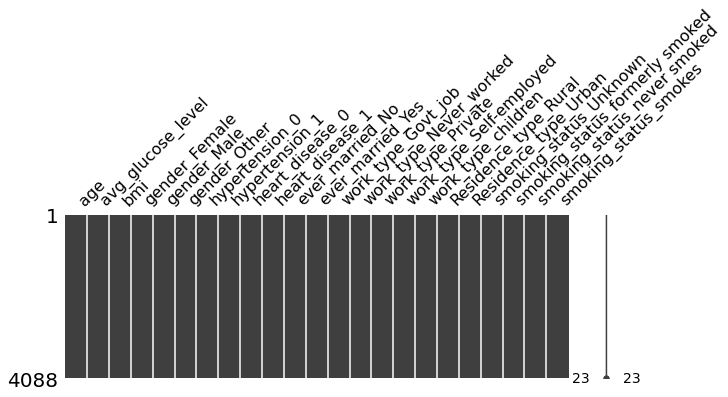

In [38]:
#missinggno is used to visualized missing values
print("\n\n--> Missing values visualizasion :\n\n")
msno.matrix(pp_X_train,figsize=(10, 3))

In [39]:
y_train.head()

1256    0
2477    0
3910    0
3132    0
3857    0
Name: stroke, dtype: object

<AxesSubplot:>

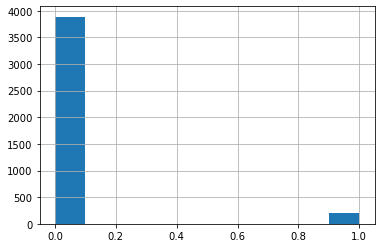

In [40]:
y_train.hist()

### Model

In [41]:
model = DecisionTreeClassifier()

In [42]:
pp_X_train.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.794419,0.382656,0.262575,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.462621,0.578751,0.453717,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.426499,0.208205,0.476522,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.169992,0.027873,0.245802,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.365231,0.460544,0.547238,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [43]:
y_train.reset_index(drop=True, inplace=True)
y_train = y_train.astype('int')

In [44]:
model.fit(X=pp_X_train.values, y=y_train.values)

DecisionTreeClassifier()

In [45]:
# Save/serialize the fitted model to local OS
with open('pickle/model.pkl', 'wb') as output_file:
    pickle.dump(model, output_file)